# Mini-Project #1 (PCA)

Student Name: **Subhadyuti Sahoo**
<br>
Course: **Adv Topics in Machine Learning**

### Importing Necessary Libraries, Modules and Classes

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times']
import pandas as pd
import statistics
import sklearn
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

### Importing the Dataset

In [2]:
dataFrame = pd.read_csv('p1dataset2021.csv', header = None)  # Forming the pandas 
                                                             # dataframe
display(dataFrame.head(5))  # Displaying the first 5 rows of pandas dataFrame

,0,1,2,3,4,5,6,7,8,9,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,HG01879,1,ACB,G,G,T,T,A,A,C,...,T,A,T,A,A,T,T,T,G,A
1,HG01880,2,ACB,A,A,T,T,A,G,C,...,G,C,T,G,A,T,C,T,G,G
2,HG01881,2,ACB,A,A,T,T,A,A,G,...,G,C,T,G,A,T,C,T,G,G
3,HG01882,1,ACB,A,A,T,C,A,A,G,...,G,A,T,G,A,T,C,T,G,G
4,HG01883,2,ACB,G,A,T,C,G,A,C,...,G,C,T,G,A,T,C,T,G,G


### Checking for Missing Values (if any)

In [3]:
# Checking if there are missing values in dataFrame
result = (dataFrame.isna().values.any()) or (dataFrame.isnull().values.any())
if (result == True):
    n_missing_values = dataFrame.isna().sum().sum() + dataFrame.isnull().sum().sum()

# Displaying if there are any missing values in dataFrame
print('--- Checking for Missing Values ---')
print('Q. Are there any missing values in the dataset?')   
if (result == True):
    print('A. Yes')
    print('Q. How many?')
    print('A. ', n_missing_values)
else:
    print('A. No') 
print('-----------------------------------')
print('\n')

--- Checking for Missing Values ---
Q. Are there any missing values in the dataset?
A. No
-----------------------------------




<a id='QuestionA'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Convert Data into Binary Matrix

To start this project, first convert the data of nucleobases to a real-valued matrix (PCA needs a real-valued matrix). In the class specifically, convert the genetic data into a $\textit{binary}$ matrix $\textbf{X}$ such that $\mathbf{X}_{i,j}$ = 0 if the $i^{\rm th}$ individual has column $j$’s mode nucleobase for his or her $j^{\rm th}$ nucleobase, and $\mathbf{X}_{i,j}$ = 1 otherwise. Note that all mutations appear as a 1, even if they are different mutations, so if the mode for column $j$ is “`G`", then if individual $i$ has an "`A`", "`T`", or "`C`", then $\mathbf{X}_{i,j}$ would still be 1.    
    

</div>

### Forming the working dataset

In [4]:
# Forming the working dataset dSet by ignoring the first 3 columns
dFrame = dataFrame.drop(columns=[0, 1, 2])  # dropping the 1st 3 columns
dSet = dFrame.to_numpy()  # getting the numpy dSet
m, n = dSet.shape   # Getting the no. of rows and columns of the dataset dSet

# Getting the vectors for genders and populations for using in plots later
genders = dataFrame.iloc[:, 1].to_numpy()
populations = dataFrame.iloc[:, 2].to_numpy()

### Forming the vector of mode nucleobases from each column

In [5]:
modej_list = []  # Creating an empty list for storing 
for j in range(n):  # Starting a for-loop to get the mode of nucelobase from each column
    dSetj = dSet[:, j]  # Assigning a column vector to a temporary variable dSetj
    modeval = statistics.mode(dSetj)  # Finding out the mode nucloebase of the jth column
    modej_list.append(modeval)  # Appending the mode nucleobase of the jth column to
                                # the empty list modej_list
    
modej = np.asarray(modej_list)  # Converting the list to a vector
modej = modej.reshape(1,n)   # Converting modej vector into a row vector

### Forming the binary matrix X

In [6]:
X = np.ones((m,n))  # Forming a matrix X with all the entries as 1
for i in range(m):  # Running a for-loop to run through all the rows of dSet
    for j in range(n):  # Running a for-loop to run through all the columns of dSet
        if dSet[i, j] == modej[0, j]:   # If condition is true, 
            X[i, j] = 0                 # then X[i, j] is changed to 0
        elif (modej[0, j] == 'G') and (dSet[i, j] == 'A' or dSet[i, j] == 'T' or dSet[i, j] == 'C'):
            X[i, j] = 1  # If above condition true, then X[i, j] remains equal to 1           

### Standardizing matrix X

In [7]:
scaler = StandardScaler()   # Forming an instance of StandardScaler() class
Xscaled = scaler.fit_transform(X)   # Scaling matrix X in order to have zero mean
                                    # and unit standard deviation

<a id='QuestionB'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b>

We will examine the first $ \texttt{2} $ principal components of $\textbf{X}$. These components contain lots of information about our data set. Create a scatter plot with each of the $ \texttt{995} $ rows of $\textbf{X}$ projected onto the first two principal components. In other words, the horizontal axis should be $ v_{1} $, the vertical axis $ v_{2} $, and each individual should be projected onto the subspace spanned by $ v_{1} $ and $ v_{2} $. Your plot must use a different color for each population and include a legend.

</div>

### Calculating the principal components of X

In [8]:
pca = PCA(n_components=4)  # Calculating 4 principal components all at once
Xprojected = pca.fit_transform(Xscaled)   # Estimating the projected matrix for Xscaled

### Scatter Plot of First Two Projections (by Populations)

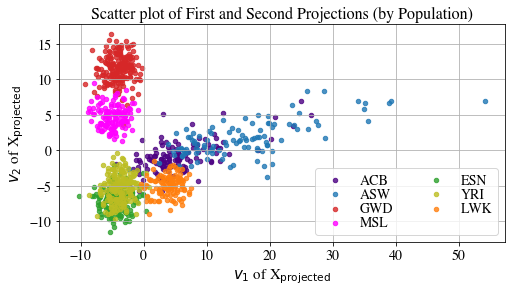

In [9]:
# Forming a dictionary to assign colors to different populations
cdict1 = {'ACB': 'indigo',     
          'ASW': 'tab:blue',  
          'GWD': 'tab:red',
          'MSL': 'magenta',
          'ESN': 'tab:green',
          'YRI': 'tab:olive',
          'LWK': 'tab:orange'
         }       

# Forming a dictionary to print the legends in plots
ldict1 = {'ACB': 'ACB',    
          'ASW': 'ASW', 
          'GWD': 'GWD',
          'MSL': 'MSL',
          'ESN': 'ESN',
          'YRI': 'YRI',
          'LWK': 'LWK'
         }   

uniquePopulations = ['ACB', 'ASW', 'GWD', 'MSL', 'ESN', 'YRI', 'LWK']  # Unique populations
V1 = Xprojected[:, 0]  # Getting the projection on first principal component
V2 = Xprojected[:, 1]  # Getting the projection on second principal component

# Scatter plot for Question (b)
fig, ax = plt.subplots(figsize=(8,4))
for p in uniquePopulations:
    idx = np.where(populations == p)
    ax.scatter(V1[idx], 
               V2[idx], 
               s=20,
               c=cdict1[p], 
               label=ldict1[p],
               alpha=0.8)
ax.set_title('Scatter plot of First and Second Projections (by Population)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=2, labelspacing=0.05, loc='lower right')
plt.grid()
plt.show()

<a id='QuestionC'></a>
<div class=" alert alert-warning">
    <b>Question.</b>

In two sentences, list $ \texttt{1} $ or $ \texttt{2} $ basic facts about the plot created above. Can you interpret the first two principal components? What aspects of the data do the first two principal components capture? Hint: think about history and geography.

</div>

<a id='AnswerQC'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

The first two principal components <u>distinctly</u> capture the clustering of the genes according to the $\textbf{populations}$ of the samples. The populations from North America ($\texttt{ACB}$ and $\texttt{ASW}$) can form one cluster, the ones from the western African nations of The Gambia and Sierra Leone ($\texttt{GWD}$ and $\texttt{MSL}$) can form the second cluster, the ones from Nigeria ($\texttt{ESN}$ and $\texttt{YRI}$) can form the third cluster and the population from Kenya ($\texttt{LWK}$) can form the fourth cluster.
    
</div>

<a id='QuestionD'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b>

We will now examine the third principal component of $\textbf{X}$. Create another scatter plot with each individual projected onto the subspace spanned by the first and third principal components. After plotting, play with different labeling schemes (with labels derived from the meta-data) to explain the clusters that you see. Your plot must include a legend.

</div>

### Scatter Plot of First and Third Projections (by Gender)

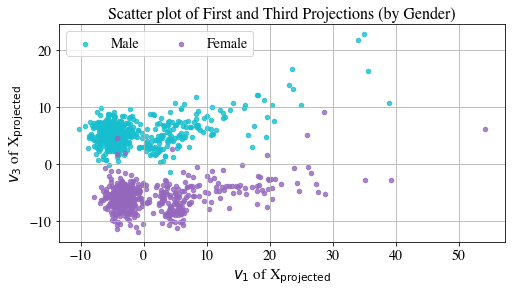

In [10]:
V3 = Xprojected[:, 2]  # Getting the projection on third principal component

# Forming a dictionary to assign colors to different genders
cdict2 = {1: 'tab:cyan',
          2: 'tab:purple'
         }

# Forming a dictionary to print the legends in plots
ldict2 = {1: 'Male',
          2: 'Female'
         }

# Scatter plot for Question (d)
fig, ax = plt.subplots(figsize=(8,4))
for g in np.unique(genders):
    idx = np.where(genders == g)
    ax.scatter(V1[idx], 
               V3[idx],
               s=20,
               c = cdict2[g], 
               label = ldict2[g],
               alpha=0.8)
ax.set_title('Scatter plot of First and Third Projections (by Gender)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{3}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=2, labelspacing=0.05, loc='upper left')
plt.grid()
plt.show()

<a id='QuestionE'></a>
<div class=" alert alert-warning">
    <b>Question.</b>

Something should have popped out at you in the plot above. In one sentence, what information does the third principal component capture?

</div>

<a id='AnswerQE'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

The third principal component <u>distinctly</u> captures the clustering of the genes according to the $\textbf{genders}$ of the samples. 
    
</div>

<a id='Student Task'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b>

You will now inspect the third principal component. Plot the nucleobase index vs the absolute value of the third principal component. 

</div>

### Scatter Plot of Nucleobase Index v/s The Absolute Value of The Third PC

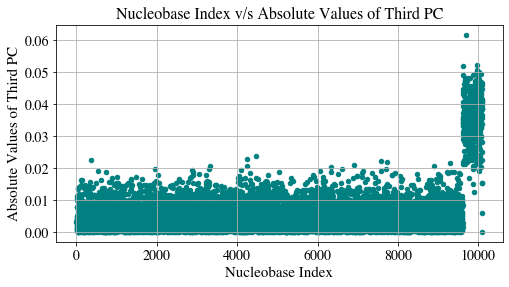

In [11]:
# Fetching the principal components
allPCs = pca.components_
absThirdPC = abs(allPCs[2, :]).reshape(-1,1)

# Forming the x-axis vector for the folowing scatter plot
xAxisVector = np.linspace(start = 1,
                          stop = 10101, 
                          num = 10101,
                          endpoint = True)
xAxisVector = xAxisVector.reshape(-1,1)

# Scatter plot for Question (f)
plotFrame = pd.DataFrame(data=np.concatenate((xAxisVector, absThirdPC), axis=1),
                         columns=['Nucleobase Index', 'Absolute Values of Third PC']
                        )
fig, ax = plt.subplots(figsize=(8,4))
plotFrame.plot(ax = ax,
               x='Nucleobase Index', 
               y='Absolute Values of Third PC', 
               kind='scatter', 
               color='teal')
ax.set_title('Nucleobase Index v/s Absolute Values of Third PC', fontsize=16)
ax.set_xlabel('Nucleobase Index', fontsize=15)
ax.set_ylabel('Absolute Values of Third PC', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.grid()
plt.show()

<a id='QuestionF'></a>
<div class=" alert alert-warning">
    <b>Question.</b>

What do you notice? What’s a possible explanation? Hint: think about chromosomes.

</div>

<a id='AnswerQF'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

The sequence of clusters is breaking at around $\texttt{9600}$ on the $x$-axis. Since the third principal component captures the clustering of genes according to the genders of the samples, the sequence is breaking possibly because the <u>difference</u> in the female chromosomes and the male chromosomes <u>become quite distinct</u> from $\sim\texttt{9600}$ nucleobase index onwards.   
    
</div>

<a id='Student Task'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b>

So far, we have simplified our dataset by capturing all deviations from the mode value with an indicator variable. This loses some information relative to the original data set. How would you create a real-valued matrix $\textbf{Y}$ suitable for PCA analysis such that there is a bijection between our input data (minus the first three columns) and $\textbf{Y}$? The matrix $\textbf{Y}$ should be a useful input to PCA.

</div>

### Forming the real-valued matrix Y

In [12]:
Y = np.ones((m,n))  # Initializing matrix Y 

# Running a for-loop to assign values to matrix Y
for i in range(m):  
    for j in range(n):   
        if dSet[i, j] == 'T':   # Y[i, j] == 4 if dSet[i, j] == 'T'
            Y[i, j] = 4
        elif dSet[i, j] == 'G':  # Y[i, j] == 3 if dSet[i, j] == 'G'
            Y[i, j] = 3
        elif dSet[i, j] == 'C':  # Y[i, j] == 2 if dSet[i, j] == 'C'
            Y[i, j] = 2
        else:                    # Y[i, j] == 1 if dSet[i, j] == 'A'
            Y[i, j] = 1 

### Standardizing matrix Y

In [13]:
Yscaled = scaler.fit_transform(Y)  # Scaling matrix Y in order to have zero mean 
                                   # and unit standard deviation

<a id='QuestionG'></a>
<div class=" alert alert-warning">
    <b>Question.</b>

Explain the reasoning behind your choice of $\textbf{Y}$. Your answer to this question should not take more than a few sentences.

</div>

<a id='AnswerQG'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

In order to get a bijection between input data (minus the first three columns) and real-valued matrix $\textbf{Y}$, here is how I mapped the nucleobase indices:
$$ \texttt{A} \mapsto \texttt{1}, \hspace{5mm} \texttt{C} \mapsto \texttt{2}, \hspace{5mm} \texttt{G} \mapsto \texttt{3}, \hspace{5mm} \texttt{T} \mapsto \texttt{4}
$$ 
    
$\textbf{Reason}$: Such a mapping was chosen over using $\texttt{OneHotEncoder()}$ because $\texttt{OneHotEncoder()}$ would have used a combination of $\texttt{0}$'s and $\texttt{1}$'s for each of the four nucleobase indices which, in turn, would have further increased the size of the dataset. 
    
</div>

<a id='Student Task'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b>

Perform PCA on the matrix $\textbf{Y}$. Create a scatter plot between the first two principal projections. 

</div>

### Calculating the principal components of Y

In [14]:
pca2 = PCA(n_components=2)  # Calculating 2 principal components all at once
Yprojected = pca2.fit_transform(Yscaled)   # Estimating the projected matrix for Yscaled

### Scatter plot

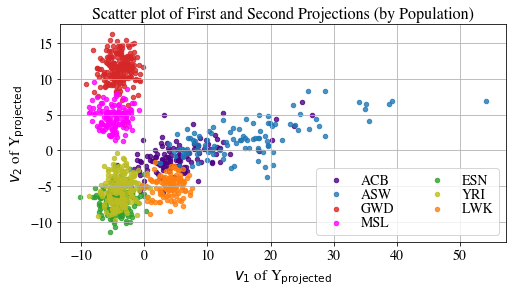

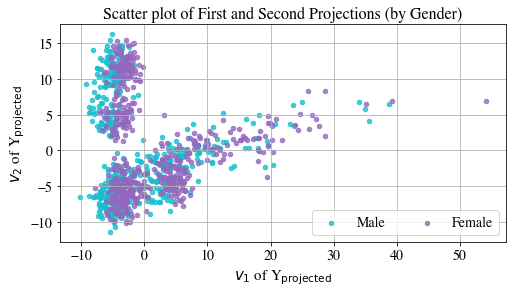

In [15]:
Vy1 = Yprojected[:, 0]  # Getting the projection on first principal component
Vy2 = Yprojected[:, 1]  # Getting the projection on second principal component

# Scatter plot for Question (h)
fig, ax = plt.subplots(figsize=(8,4))
for p in uniquePopulations:
    idx = np.where(populations == p)
    ax.scatter(Vy1[idx], 
               Vy2[idx], 
               s=20,
               c = cdict1[p], 
               label = ldict1[p],
               alpha=0.8)
ax.set_title('Scatter plot of First and Second Projections (by Population)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of Y$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{2}$ of Y$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=2, labelspacing=0.05, loc='lower right')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
for g in np.unique(genders):
    idx = np.where(genders == g)
    ax.scatter(Vy1[idx], 
               Vy2[idx], 
               s=20,
               c = cdict2[g], 
               label = ldict2[g],
               alpha=0.8)
ax.set_title('Scatter plot of First and Second Projections (by Gender)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of Y$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{2}$ of Y$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=2, labelspacing=0.05, loc='lower right')
plt.grid()
plt.show()

<a id='QuestionH'></a>
<div class=" alert alert-warning">
    <b>Question.</b>

What added value (if any) does this more complex representation add?

</div>

<a id='AnswerQH'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

Since the first two principal components capture the clustering of the genes according to the populations of the samples and since the real-valued matrix $\textbf{Y}$ is also standardized, this complex representation does not add any extra value to the visualization aspect.
    
</div>

<a id='QuestionI'></a>
<div class=" alert alert-warning">
    <b>Question.</b>

Can you uncover what information is captured in the fourth principal component of $\textbf{X}$?

</div>

### Scatter plot of First and Fourth Projections of X

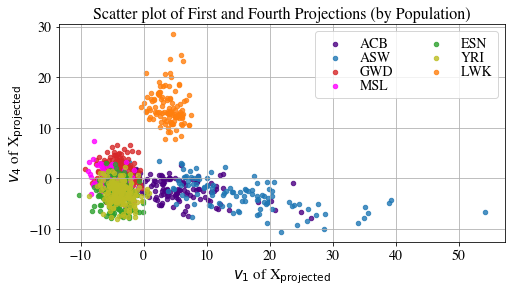

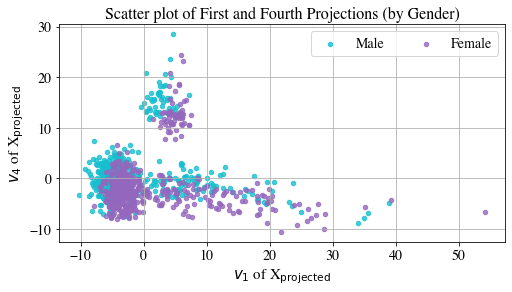

In [16]:
V4 = Xprojected[:, 3]  # Getting the projection on foruth principal component

# Scatter plot for Question (i)
fig, ax = plt.subplots(figsize=(8,4))
for p in uniquePopulations:
    idx = np.where(populations == p)
    ax.scatter(V1[idx], 
               V4[idx], 
               s=20,
               c = cdict1[p], 
               label = ldict1[p],
               alpha=0.8)
ax.set_title('Scatter plot of First and Fourth Projections (by Population)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{4}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=2, labelspacing=0.05, loc='upper right')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
for g in np.unique(genders):
    idx = np.where(genders == g)
    ax.scatter(V1[idx], 
               V4[idx], 
               s=20,
               c = cdict2[g], 
               label = ldict2[g],
               alpha=0.8)
ax.set_title('Scatter plot of First and Fourth Projections (by Gender)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{4}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=3, labelspacing=0.05, loc='upper right')
plt.grid()
plt.show()

<a id='AnswerQI'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

This scatter plot also shows the clustering of the genes according to the populations of the samples. It uncovers the information that: 

1. populations from North America ($\texttt{ACB}$ and $\texttt{ASW}$) have almost identical genes
2. populations from the three western African nations of The Gambia ($\texttt{GWD}$), Sierra Leone ($\texttt{MSL}$) and Nigeria ($\texttt{ESN}$ and $\texttt{YRI}$) have almost identical genes
3. population from eastern African nation of Kenya ($\texttt{LWK}$) has a completely different gene from the above two populations
    
</div>